In [1]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import seaborn as sns
sns.set_context('poster')
%matplotlib inline
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from 'neuraltda/simpComp.pyc'>

In [45]:
ncells = 50
nwin = 500
p = 0.02
binMat = (np.random.rand(ncells, nwin) < p).astype(int)


In [46]:
nsteps = 3000
beta = 0.1
msimps = sc.binarytomaxsimplex(binMat=binMat, rDup=True)
Eold = sc.simplicialChainGroups(msimps)
JSsave = []
d=1
p=0.04
for step in range(nsteps):
    
    if not np.mod(step, 500):
        print(step)
        
    if step==1000:
        p=0.02
    binMat = binMat[:, 1:]
    newVec = (np.random.rand(ncells)<p).astype(int)
    binMat = np.insert(binMat, -1, newVec, axis=1)
    
    msimps = sc.binarytomaxsimplex(binMat=binMat, rDup=True)
    Emodel = sc.simplicialChainGroups(msimps)

    Ecombined = sc.simplexUnion(Eold, Emodel)
    Dold = sc.maskedBoundaryOperatorMatrix(Ecombined, Eold)
    Dnew = sc.maskedBoundaryOperatorMatrix(Ecombined, Emodel)
        
    Lsamp = sc.laplacian(Dnew, d)
    Ldata = sc.laplacian(Dold, d)
    rsamp = sc.densityMatrix(Lsamp, beta)    
    rdata = sc.densityMatrix(Ldata, beta)
        
    JSsave.append(sc.KLdivergence(rdata, rsamp))
    #Eold = Emodel

0


KeyboardInterrupt: 

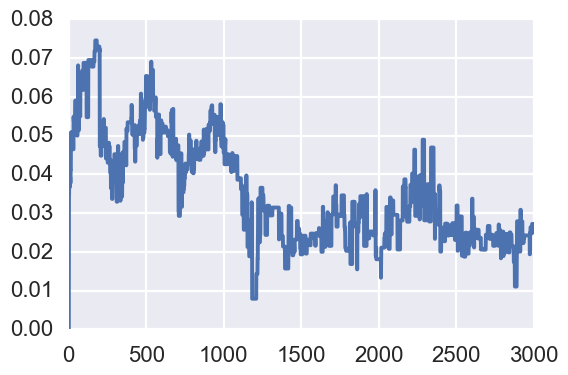

In [44]:
plt.plot(JSsave)

(20, 500)